<a href="https://colab.research.google.com/github/Cairo-Henrique/Estrutura-e-dinamica-de-redes-complexas/blob/main/SIR_Epidemic_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Epidemic Spreading on Complex Networks: Impact of Assortativity

This notebook explores the Susceptible-Infected-Recovered (SIR) epidemic model on various complex networks, with a particular focus on how network assortativity influences disease dynamics. It demonstrates both a basic custom SIR simulation and the use of the `EoN` (Epidemics on Networks) library for more robust simulations.

## Table of Contents

1.  [Introduction](#introduction)
2.  [Packages](#packages)
3.  [Custom SIR Simulation Functions](#custom-sir-simulation-functions)
4.  [Network Creation](#network-creation)
5.  [Basic SIR Simulation](#basic-sir-simulation)
6.  [Epidemics on Networks (EoN) Module](#epidemics-on-networks-eon-module)
7.  [Changing Assortativity via Xulvi-Brunet–Sokolov Algorithm](#changing-assortativity-via-xulvi-brunet–sokolov-algorithm)
8.  [Influence of Assortativity on Epidemics](#influence-of-assortativity-on-epidemics)

## Introduction

Epidemic models like SIR are fundamental tools for understanding how infectious diseases spread through populations. When these populations are structured as complex networks, the underlying topology significantly impacts the epidemic's course. This notebook investigates how degree assortativity – the tendency of nodes to connect to others with similar degrees – affects key epidemic metrics such as peak infection, final epidemic size, and duration.

## Packages

The following Python packages are used:

*   `EoN`: Epidemics on Networks library for efficient epidemic simulations.
*   `networkx`: For creating and manipulating graph structures.
*   `matplotlib`: For plotting and visualization.
*   `numpy`: For numerical operations.

Packages

In [1]:
!pip install EoN

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for EoN: filename=EoN-1.2-py3-none-any.whl size=122468 sha256=3292039ee2b06a26bbebc7314dc794bf7ab9a47188e311398d584bea6283bb45
  Stored in directory: /root/.cache/pip/wheels/53/e8/9d/8cce28ba7bdd58b1859da5582e7ca593ceae00cf9c996a3467
Successfully built EoN


In [2]:
import networkx as nx
import EoN as eon
import matplotlib.pyplot as plt
import random
import numpy as np

Functions

In [3]:
def infect(G):
  # Seleciona um nó aleatório como I e adiciona o atributo S ao resto
  nx.set_node_attributes(G, 'S', 'state')
  node = np.random.choice(G.nodes())
  G.nodes[node]['state'] = 'I'
  return G

def update(G):
  # a cada iteração, os vizinhos de um nó I se tornam I com probabilidade beta
  # e um I se torna R com probabilidade gamma
  H = G.copy()
  for node in G.nodes():
    if G.nodes[node]['state'] == 'I':
      for neighbor in G.neighbors(node):
        if G.nodes[neighbor]['state'] == 'S' and np.random.rand() < beta:
          H.nodes[neighbor]['state'] = 'I'
      if np.random.rand() < gamma:
        H.nodes[node]['state'] = 'R'
  return H

def SIR_epidemic(G, tmax):
  # Loop
  S = np.zeros(tmax)
  I = np.zeros(tmax)
  R = np.zeros(tmax)
  G = infect(G)
  n = len(G.nodes())
  for t in np.arange(tmax):
    S[t] = len([node for node in G.nodes() if G.nodes[node]['state'] == 'S']) / n
    I[t] = len([node for node in G.nodes() if G.nodes[node]['state'] == 'I']) / n
    R[t] = len([node for node in G.nodes() if G.nodes[node]['state'] == 'R']) / n

    if I[t] == 0:
      #print('A infeccção desapareceu!')
      S[t:] = S[t] * np.ones(tmax - t)
      I[t:] = np.zeros(tmax - t)
      R[t:] = R[t] * np.ones(tmax - t)
      break

    G = update(G)
  return S, I, R

def SIR_epidemic_summary(S, I, R, tmax):

  array_t = np.arange(tmax)

  max_infected = np.max(I)
  time_of_peak_infection_index = np.argmax(I)
  time_of_peak_infection = array_t[time_of_peak_infection_index]

  final_S = S[-1]
  final_I = I[-1]
  final_R = R[-1]

  print(f"Maximum proportion of infected individuals: {max_infected:.4f}")
  print(f"Time of peak infection: {time_of_peak_infection} time steps")
  print(f"Final proportion of susceptible individuals: {final_S:.4f}")
  print(f"Final proportion of infected individuals: {final_I:.4f}")
  print(f"Final proportion of recovered individuals: {final_R:.4f}")

  infection_end_time_index = np.where(I == 0)[0]
  if len(infection_end_time_index) > 0:
      epidemic_duration = array_t[infection_end_time_index[0]]
      print(f"Epidemic duration: {epidemic_duration} time steps (infected population reached zero).")
  else:
      print(f"Infected population did not fully die out within the simulated time.")

  return

Network creation (select one)

In [4]:
# Parâmetros da rede

m = 2500 # número esperado de arestas
n = 1000 # número de vértices

In [5]:
# Grafo aleatório Erdos-Renyi

p = 2 * m / (n*(n-1)) # probabilidade de conexão de cada novo vértice
G = nx.erdos_renyi_graph(n, p) # n vértices com probabilidade de conexão p

In [6]:
# Grafo aleatório Barabási-Albert

nos_conectados = 1 # número de vértices conectados a cada novo vértice
G = nx.barabasi_albert_graph(n, nos_conectados)

In [7]:
# Grafo aleatório Watts-Strogatz (Small World)
k = 4 # grau
p = 0.1 # probabilidade de rearesta
G = nx.watts_strogatz_graph(n, k, p)

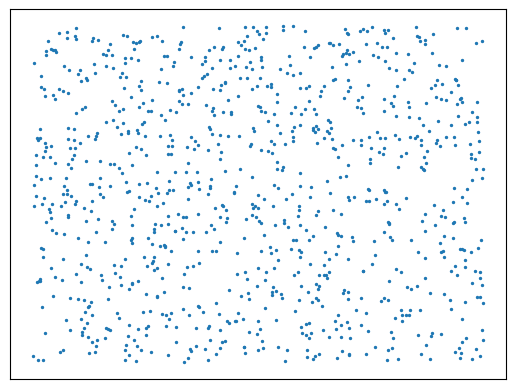

In [8]:
pos = nx.random_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=2)
plt.show()

Simulation

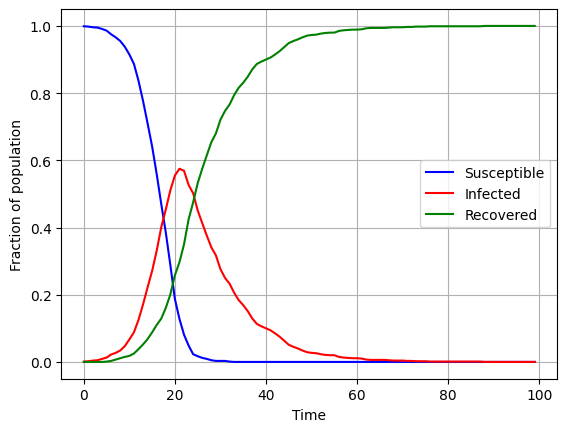

Maximum proportion of infected individuals: 0.5750
Time of peak infection: 21 time steps
Final proportion of susceptible individuals: 0.0000
Final proportion of infected individuals: 0.0000
Final proportion of recovered individuals: 1.0000
Epidemic duration: 88 time steps (infected population reached zero).


In [76]:
# Parâmetros do loop
beta = 0.4 # probabilidade de infecção
gamma = 0.1 # probabilidade de recuperação
tmax = 100 # número de iteracoes

# loop
S, I, R = SIR_epidemic(G, tmax)
array_t = np.arange(tmax)

# Gráfico
plt.figure()
plt.plot(array_t, S, label='Susceptible', color='blue')
plt.plot(array_t, I, label='Infected', color='red')
plt.plot(array_t, R, label='Recovered', color='green')
plt.grid(True)
plt.xlabel('Time')
plt.ylabel('Fraction of population')
plt.legend()
plt.show()

# Resultados
SIR_epidemic_summary(S, I, R, tmax)

γ = 0: SI model

γ = 1: Reed-Frost SIR Model

β = 0: no epidemic (same result as the infection starting out of the giant component)

β = 1: S, I → 0 and R → 1 as t → ∞

Epidemics on Networks Module

[Documentation](https://epidemicsonnetworks.readthedocs.io/en/latest/index.html)

In [89]:
def pad_to_length(arr, length):
    if len(arr) >= length:
        return arr[:length]
    else:
        return np.pad(arr, (0, length - len(arr)), mode='edge')

def SIR_epidemics(G, simulations, tmax, beta, gamma, fraction_infected):

    matrix_S = np.empty((0, tmax))
    matrix_I = np.empty((0, tmax))
    matrix_R = np.empty((0, tmax))

    plt.figure()

    for counter in range(simulations): #run simulations
      t, S, I, R = eon.fast_SIR(G, beta, gamma, rho = fraction_infected, tmax = tmax)
      S = pad_to_length(S, tmax) / n
      I = pad_to_length(I, tmax) / n
      R = pad_to_length(R, tmax) / n
      t = np.arange(tmax)

      if counter == 0:
        plt.plot(t, S, label='Susceptible', color='blue')
        plt.plot(t, I, label='Infected', color='red')
        plt.plot(t, R, label='Recovered', color='green')
      plt.plot(t, S, color='blue')
      plt.plot(t, I, color='red')
      plt.plot(t, R, color='green')

      matrix_S = np.vstack((matrix_S, S))
      matrix_I = np.vstack((matrix_I, I))
      matrix_R = np.vstack((matrix_R, R))

    plt.grid(True)
    plt.xlabel('Time')
    plt.ylabel('Fraction of population')
    plt.legend()
    plt.show()

    return matrix_S, matrix_I, matrix_R

def SIR_epidemics_summary(matrix_S, matrix_I, matrix_R, tmax):

    array_t = np.arange(tmax)

    # Mean curves
    mean_S = np.mean(matrix_S, axis=0)
    mean_I = np.mean(matrix_I, axis=0)
    mean_R = np.mean(matrix_R, axis=0)

    # Summary metrics from the mean curves
    max_infected = np.max(mean_I)
    time_of_peak_infection_index = np.argmax(mean_I)
    time_of_peak_infection = array_t[time_of_peak_infection_index]

    final_S = mean_S[-1]
    final_I = mean_I[-1]
    final_R = mean_R[-1]

    print("=== Mean Results Across Simulations ===")
    print(f"Maximum proportion of infected individuals: {max_infected:.4f}")
    print(f"Time of peak infection: {time_of_peak_infection} time steps")
    print(f"Final proportion of susceptible individuals: {final_S:.4f}")
    print(f"Final proportion of infected individuals: {final_I:.4f}")
    print(f"Final proportion of recovered individuals: {final_R:.4f}")

    # Separate simulations into two cases:
    # Case 1: epidemic died out early
    # Case 2: epidemic had a large outbreak

    threshold = 0.05   # 5% infected peak, adjust if needed

    case1_indices = []   # died out
    case2_indices = []   # major outbreak

    for sim in range(matrix_I.shape[0]):
        if np.max(matrix_I[sim]) < threshold:
            case1_indices.append(sim)
        else:
            case2_indices.append(sim)

    print("Simulations where epidemic died out:", len(case1_indices))
    print("Simulations with major outbreak:", len(case2_indices))

    return

Changing assortativity via Xulvi-Brunet–Sokolov algorithm

In [85]:
def assortative_xbs(G, rho, assortative=True, num_iterations=len(G.edges)): # Turn network assortative

  for _ in range(num_iterations):

    # Select 2 edges for 4 nodes
    edge1, edge2 = random.sample(list(G.edges()), 2)
    nodes = list(edge1) + list(edge2)

    while len(set(nodes)) < 4: # ensure all 4 nodes are distinct
      edge1, edge2 = random.sample(list(G.edges()), 2)
      nodes = list(edge1) + list(edge2)

    # Sort the four nodes by their degree
    nodes = sorted(nodes, key=lambda x: G.degree(x))

    if np.random.rand() < rho:

      # Remove current edges
      G.remove_edge(edge1[0], edge1[1])
      G.remove_edge(edge2[0], edge2[1])

      if assortative:
        # Connect nodes with similar degree
        G.add_edge(nodes[0], nodes[1])
        G.add_edge(nodes[2], nodes[3])

      else:
        # Connect nodes with different degree
        G.add_edge(nodes[0], nodes[3])
        G.add_edge(nodes[1], nodes[2])

  return G

In [100]:
# Parameters
rho = 1 # Probability of each iteration occuring. To turn network assortative or disassortative to the maximum, use rho = 1
num_iterations = 100*len(G.edges())

# Create rewired graphs
assortative_G = assortative_xbs(G.copy(), rho, assortative=True, num_iterations=num_iterations)
disassortative_G = assortative_xbs(G.copy(), rho, assortative=False, num_iterations=num_iterations)

print("Original assortativity coefficient:", nx.degree_assortativity_coefficient(G))
print("Assortative graph:", nx.degree_assortativity_coefficient(assortative_G))
print("Disassortative graph:", nx.degree_assortativity_coefficient(disassortative_G))

Original assortativity coefficient: 0.0012077294686020311
Assortative graph: 0.9615770170963226
Disassortative graph: -0.8611503888345916


**Influence of assortativity on epidemics**

Assortative networks tend to facilitate larger and potentially faster epidemics, as high-degree nodes (super-spreaders) are connected to other high-degree nodes, creating efficient pathways for disease spread.

Disassortative networks tend to suppress epidemics, leading to smaller outbreaks, as high-degree nodes are primarily connected to low-degree nodes, which can act as buffers against widespread transmission.

In [101]:
tmax = 2500
simulations = 100  #number of simulations
beta = 0.4           #transmission rate
gamma = 0.1    #recovery rate
fraction_infected = 1 / n      #random fraction initially infected

Original netwok

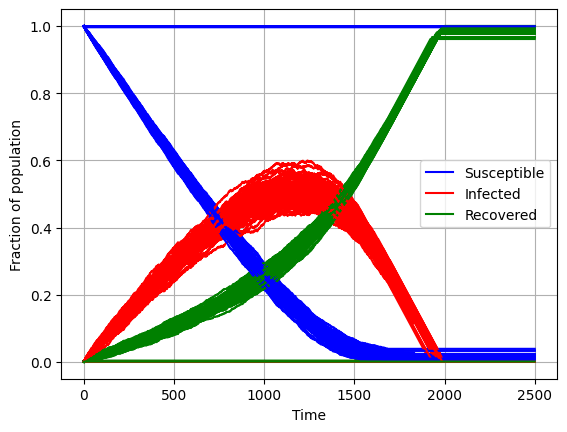

=== Mean Results Across Simulations ===
Maximum proportion of infected individuals: 0.4694
Time of peak infection: 1172 time steps
Final proportion of susceptible individuals: 0.0897
Final proportion of infected individuals: 0.0000
Final proportion of recovered individuals: 0.9103
Simulations where epidemic died out: 8
Simulations with major outbreak: 92


In [102]:
# Simulação
matrix_S, matrix_I, matrix_R = SIR_epidemics(G, simulations, tmax, beta, gamma, fraction_infected)

# Resultados
SIR_epidemics_summary(matrix_S, matrix_I, matrix_R, tmax)

Assortative network

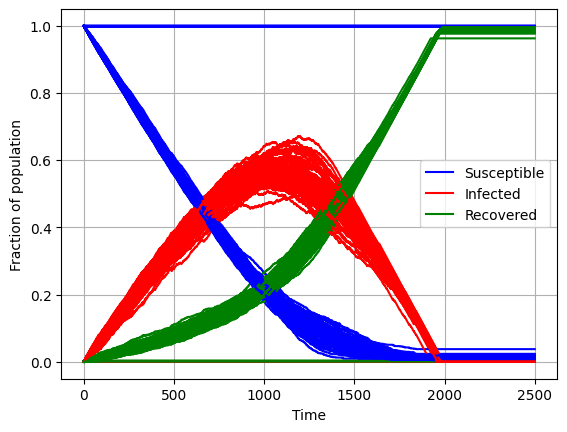

=== Mean Results Across Simulations ===
Maximum proportion of infected individuals: 0.5264
Time of peak infection: 1056 time steps
Final proportion of susceptible individuals: 0.0812
Final proportion of infected individuals: 0.0000
Final proportion of recovered individuals: 0.9188
Simulations where epidemic died out: 7
Simulations with major outbreak: 93


In [103]:
# Simulação
matrix_S, matrix_I, matrix_R = SIR_epidemics(assortative_G, simulations, tmax, beta, gamma, fraction_infected)

# Resultados
SIR_epidemics_summary(matrix_S, matrix_I, matrix_R, tmax)

Disassortative network

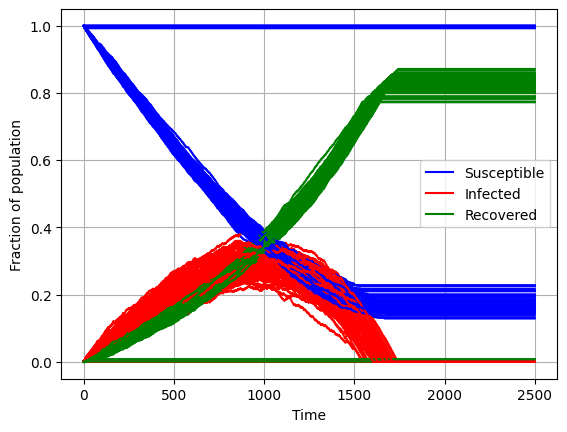

=== Mean Results Across Simulations ===
Maximum proportion of infected individuals: 0.2172
Time of peak infection: 995 time steps
Final proportion of susceptible individuals: 0.3775
Final proportion of infected individuals: 0.0000
Final proportion of recovered individuals: 0.6225
Simulations where epidemic died out: 25
Simulations with major outbreak: 75


In [104]:
# Simulação
matrix_S, matrix_I, matrix_R = SIR_epidemics(disassortative_G, simulations, tmax, beta, gamma, fraction_infected)

# Resultados
SIR_epidemics_summary(matrix_S, matrix_I, matrix_R, tmax)